In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 30
page_size = 1000

reviews = []

In [3]:
# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 1000 total reviews
Scraping page 2
   ---> 2000 total reviews
Scraping page 3
   ---> 3000 total reviews
Scraping page 4
   ---> 3826 total reviews
Scraping page 5
   ---> 3826 total reviews
Scraping page 6
   ---> 3826 total reviews
Scraping page 7
   ---> 3826 total reviews
Scraping page 8
   ---> 3826 total reviews
Scraping page 9
   ---> 3826 total reviews
Scraping page 10
   ---> 3826 total reviews
Scraping page 11
   ---> 3826 total reviews
Scraping page 12
   ---> 3826 total reviews
Scraping page 13
   ---> 3826 total reviews
Scraping page 14
   ---> 3826 total reviews
Scraping page 15
   ---> 3826 total reviews
Scraping page 16
   ---> 3826 total reviews
Scraping page 17
   ---> 3826 total reviews
Scraping page 18
   ---> 3826 total reviews
Scraping page 19
   ---> 3826 total reviews
Scraping page 20
   ---> 3826 total reviews
Scraping page 21
   ---> 3826 total reviews
Scraping page 22
   ---> 3826 total reviews
Scraping page 23
   ---> 3826 total revie

In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | When dropping off my luggag...
1,✅ Trip Verified | If you can’t fly First Class...
2,Not Verified | Singapore to Heathrow. Busine...
3,Not Verified | I reported my damaged/ruined ...
4,"Not Verified | On March 1st, I flew from Ber..."


In [5]:
df.to_csv('//content//BritishAirwaysData.csv')

In [6]:
df

,reviews
0,✅ Trip Verified | When dropping off my luggag...
1,✅ Trip Verified | If you can’t fly First Class...
2,Not Verified | Singapore to Heathrow. Busine...
3,Not Verified | I reported my damaged/ruined ...
4,"Not Verified | On March 1st, I flew from Ber..."
...,...
3821,HKG-LHR in New Club World on Boeing 777-300 - ...
3822,LHR to HAM. Purser addresses all club passenge...
3823,My son who had worked for British Airways urge...
3824,London City-New York JFK via Shannon on A318 b...


In [7]:
df1= df
df1

,reviews
0,✅ Trip Verified | When dropping off my luggag...
1,✅ Trip Verified | If you can’t fly First Class...
2,Not Verified | Singapore to Heathrow. Busine...
3,Not Verified | I reported my damaged/ruined ...
4,"Not Verified | On March 1st, I flew from Ber..."
...,...
3821,HKG-LHR in New Club World on Boeing 777-300 - ...
3822,LHR to HAM. Purser addresses all club passenge...
3823,My son who had worked for British Airways urge...
3824,London City-New York JFK via Shannon on A318 b...


Topic Modelling

In [8]:
pip install gensim


In [9]:
pip install nltk


In [10]:
pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 19.4 MB/s eta 0:00:00


In [11]:
import nltk
from nltk.corpus import reuters
from nltk.corpus import stopwords
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Download the Reuters corpus
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('punkt')

# Get stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [12]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Download NLTK stopwords if not already done
nltk.download('stopwords')
nltk.download('punkt')

# Get stopwords
stop_words = set(stopwords.words('english'))

# Assuming your dataframe is named df and the text column is 'text_column'
# Load your dataframe
# df = pd.read_csv('path_to_your_csv.csv')  # Uncomment and modify if you need to load your dataframe from a CSV file

# Preprocess function
def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha()]  # Remove punctuation
    tokens = [token for token in tokens if token not in stop_words]  # Remove stopwords
    return tokens

# Apply preprocessing to the text column of your dataframe
texts = df1['reviews'].apply(preprocess)

# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(texts)

# Filter out words that occur in less than 5 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(text) for text in texts]

# Set the number of topics.
num_topics = 10

# Train the LDA model.
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Print the topics with their words and probabilities.
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx}\nWords: {topic}\n")




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Topic: 0
Words: 0.026*"seat" + 0.020*"class" + 0.018*"seats" + 0.018*"business" + 0.010*"cabin" + 0.009*"food" + 0.009*"economy" + 0.008*"one" + 0.008*"get" + 0.008*"crew"

Topic: 1
Words: 0.014*"airways" + 0.014*"british" + 0.013*"luggage" + 0.012*"london" + 0.012*"service" + 0.012*"customer" + 0.010*"bag" + 0.009*"would" + 0.009*"trip" + 0.009*"baggage"

Topic: 2
Words: 0.016*"good" + 0.015*"food" + 0.013*"service" + 0.010*"crew" + 0.010*"cabin" + 0.009*"seats" + 0.009*"seat" + 0.008*"economy" + 0.008*"club" + 0.008*"london"

Topic: 3
Words: 0.017*"trip" + 0.016*"crew" + 0.013*"cabin" + 0.011*"staff" + 0.010*"london" + 0.010*"diego" + 0.010*"phoenix" + 0.010*"food" + 0.010*"check" + 0.010*"accommodating"

Topic: 4
Words: 0.013*"british" + 0.013*"airways" + 0.010*"london" + 0.010*"service" + 0.010*"airline" + 0.010*"would" + 0.009*"get" + 0.009*"flights" + 0.009*"hours" + 0.009*"customer"

Topic: 5
Words: 0.021*"staff" + 0.021*"heathrow" + 0.017*"airways" + 0.016*"british" + 0.014*"ho

In [13]:
# Visualize the topics.
vis_data = gensimvis.prepare(lda_model, corpus, dictionary) # Use 'dictionary' instead of 'directory'
pyLDAvis.display(vis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CUSTOMER BOOKING PREDICTION USING ENSEMBLES ( Random Forest and Logistic Regression)

In [14]:
df2= pd.read_csv('//content//customer_booking.csv', encoding='latin1' )
df2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
categorical_columns = [ 'sales_channel','trip_type', 'flight_day', 'route', 'booking_origin']

for column in categorical_columns:
    le = LabelEncoder()
    df2[column] = le.fit_transform(df2[column])
    label_encoders[column] = le
# Normalization Purchase_lead Column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2['purchase_lead'] = scaler.fit_transform(df2['purchase_lead'].values.reshape(-1, 1))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


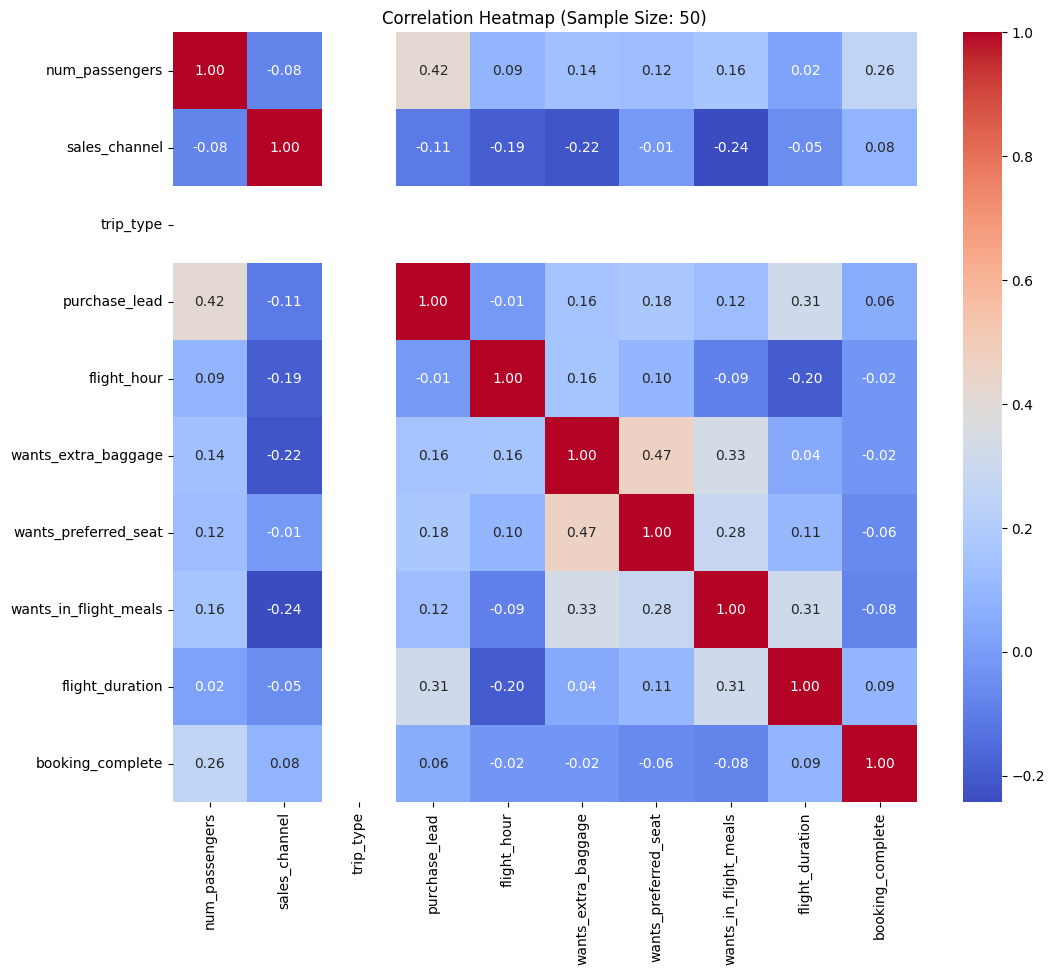

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
# Function to compute and plot correlation matrix for specific columns and a sample size of 50 rows
def compute_and_plot_correlation(df, columns, sample_size=50):
    # Ensure the columns provided are in the dataframe
    column_names = [col for col in columns if col in df.columns]
    if not column_names:
        raise ValueError("None of the specified columns are in the dataframe.")

    # Sample data from specified columns
    df_sample = df[column_names].sample(n=sample_size, random_state=0)
    correlation_matrix = df_sample.corr()  # Compute correlation matrix for specified columns

    # Plot the heatmap
    plt.figure(figsize=(12, 10))  # Adjust figure size as needed
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=column_names, yticklabels=column_names)
    plt.title(f"Correlation Heatmap (Sample Size: {sample_size})")
    plt.show()

# Specify the columns you want to use by their names
selected_columns_names = ['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead', 'lenght_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete']

# Compute and plot correlation matrix using the specified columns and sample size
compute_and_plot_correlation(df2, selected_columns_names)

In [17]:
Y= df2['booking_complete']
X= df2.drop(['booking_complete'], axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
X.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,0,2,0.302191,19,7,2,0,61,1,0,0,5.52
1,1,0,2,0.129181,20,3,2,0,61,0,0,0,5.52
2,2,0,2,0.280277,22,17,6,0,36,1,1,0,5.52
3,1,0,2,0.110727,31,4,2,0,61,0,0,1,5.52
4,2,0,2,0.078431,22,15,6,0,36,1,0,1,5.52


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
Logistic_Model= LogisticRegression()
Logistic_Model.fit(X_train, y_train)

Random_Forest_Model= RandomForestClassifier()
Random_Forest_Model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

In [22]:
Predicted_Logistic= Logistic_Model.predict(X_test)
Predicted_Random_Forest= Random_Forest_Model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
Logistic_score = accuracy_score(y_test, Predicted_Logistic)
RF_score = accuracy_score(y_test, Predicted_Random_Forest)

print("Accuracy score (Logistic): ", Logistic_score)
print("Accuracy score (RandomForest): ", RF_score)

Accuracy score (Logistic):  0.8518666666666667
Accuracy score (RandomForest):  0.8539333333333333


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


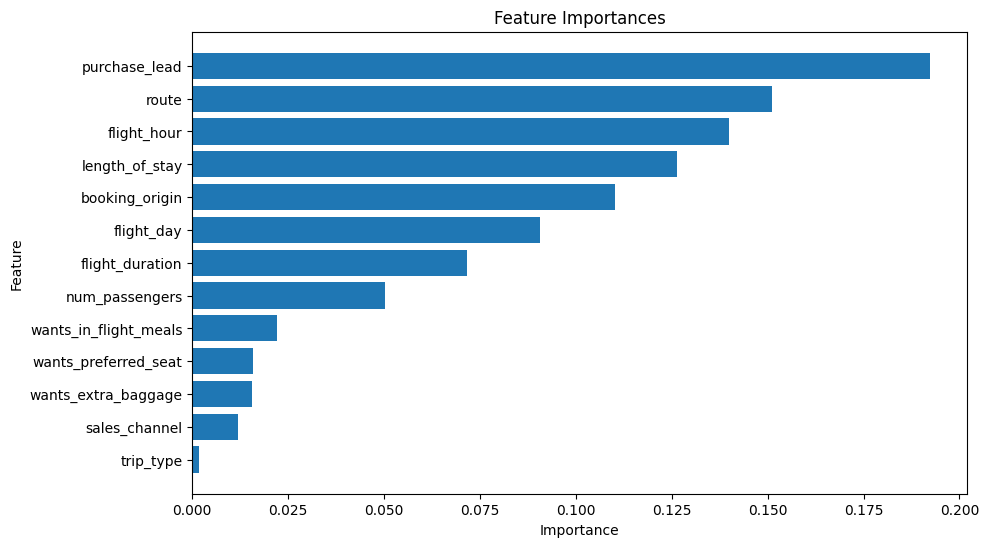

In [24]:
# Get feature importances
importances = Random_Forest_Model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, Predicted_Random_Forest)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[12582,   202],
       [ 1989,   227]])

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, Predicted_Logistic)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[12778,     6],
       [ 2216,     0]])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


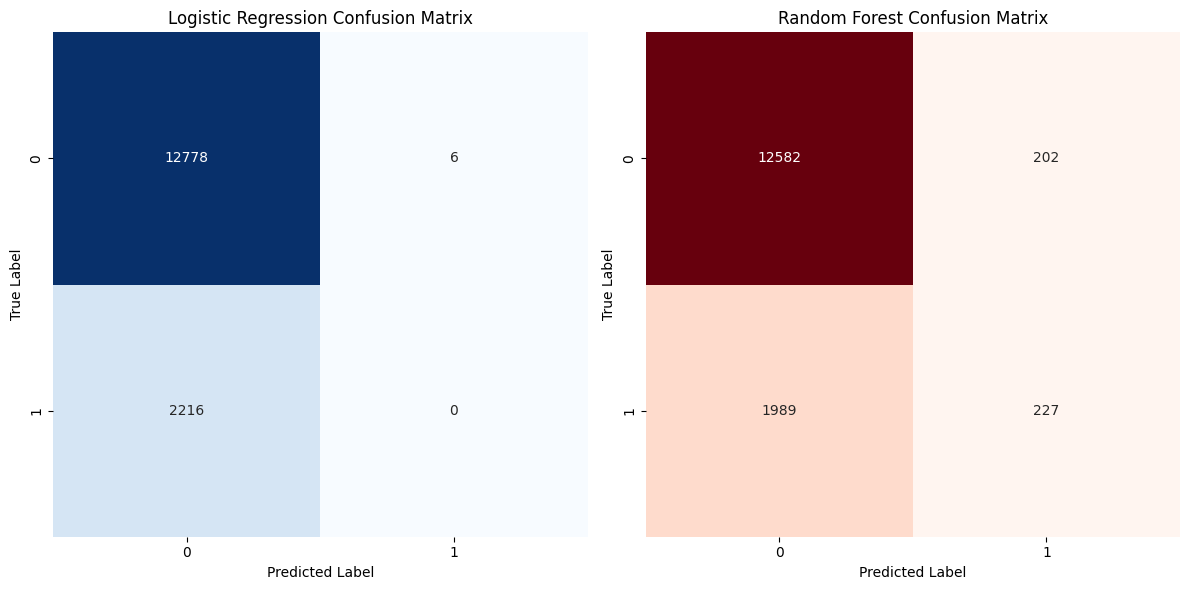

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already calculated the confusion matrices:
cm_logistic = confusion_matrix(y_test, Predicted_Logistic)
cm_rf = confusion_matrix(y_test, Predicted_Random_Forest)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot Logistic Regression confusion matrix
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot Random Forest confusion matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds', cbar=False, ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 61.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


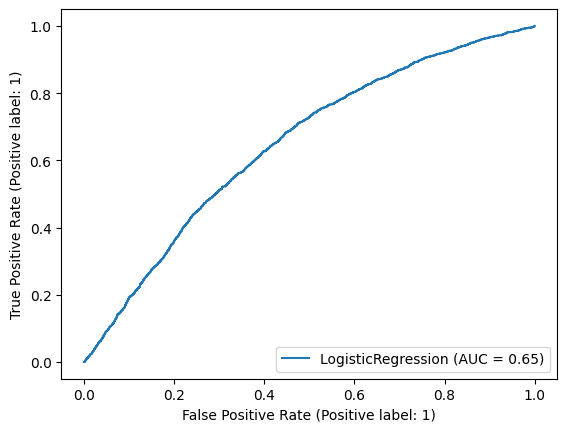

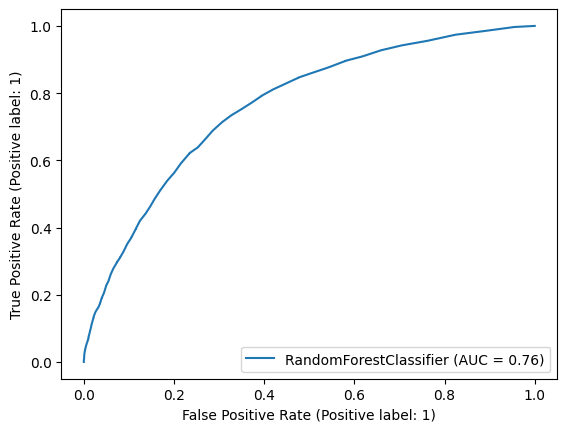

In [28]:
!pip install --upgrade scikit-learn
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(Logistic_Model, X_test, y_test)
RocCurveDisplay.from_estimator(Random_Forest_Model, X_test, y_test)

In [29]:
from sklearn.ensemble import VotingClassifier

# Create the Voting Classifier
Ensemble_Model = VotingClassifier(estimators=[
    ('rf', Random_Forest_Model),
    ('lr', Logistic_Model)
], voting='hard')

# Train the Voting Classifier
Ensemble_Model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('lr', LogisticRegression())])

In [30]:
#test our model on the test data
Ensemble=Ensemble_Model.score(X_test, y_test)
print("Accuracy score (Ensemble Model): ", Ensemble)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy score (Ensemble Model):  0.8522666666666666


In [31]:
confusion_matrix(y_test, Ensemble_Model.predict(X_test))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[12784,     0],
       [ 2216,     0]])